In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

In [2]:
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV  
)

In [3]:
from sklearn.preprocessing import (
    StandardScaler, 
    LabelEncoder,  
    PolynomialFeatures 
)

In [4]:
from sklearn.linear_model import (
    LinearRegression, 
    Ridge,
    Lasso, 
    LogisticRegression
)

In [5]:
from sklearn.tree import (
    DecisionTreeRegressor,  
    DecisionTreeClassifier  
)

In [6]:
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,  
    GradientBoostingRegressor, 
    GradientBoostingClassifier  
)

In [7]:
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB

In [8]:
from sklearn.neighbors import (
    KNeighborsRegressor,
    KNeighborsClassifier
)

In [9]:
from xgboost import XGBRegressor, XGBClassifier

In [10]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,  
    r2_score,  
    accuracy_score,
    precision_score,  
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report, 
    log_loss, 
    roc_auc_score, 
    roc_curve  
)

In [11]:
import os

In [12]:
os.makedirs('PREDICTWISE_models', exist_ok=True)
os.makedirs('PREDICTWISE_visualizations', exist_ok=True) 

In [14]:
df = pd.read_csv('Exam_Score_PredictionExcel.csv')

In [15]:
df.head(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [16]:
df.tail(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


In [17]:
df.shape

(20000, 13)

In [18]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [20]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [22]:
print(f"Total data points: {df.shape[0] * df.shape[1]:,}")

Total data points: 260,000


In [24]:
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

    1. student_id
    2. age
    3. gender
    4. course
    5. study_hours
    6. class_attendance
    7. internet_access
    8. sleep_hours
    9. sleep_quality
   10. study_method
   11. facility_rating
   12. exam_difficulty
   13. exam_score


In [26]:
len(df.columns)

13

In [28]:
#Data types summary
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"{dtype}: {count} columns")

object: 7 columns
float64: 4 columns
int64: 2 columns


In [29]:
df.duplicated().sum()

np.int64(0)

In [33]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [36]:
#analyzing categorical columns
if len(categorical_cols) > 0:
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"\nColumn: {col}")
        print(f"Unique values: {unique_count}")
        if unique_count <= 15:  
            print(f"Distribution:")
            value_counts = df[col].value_counts()
            for value, count in value_counts.items():
                pct = (count / len(df)) * 100
                print(f"      {value}: {count} ({pct:.1f}%)")
else:
    print("No categorical columns found")


Column: gender
Unique values: 3
Distribution:
      other: 6726 (33.6%)
      male: 6695 (33.5%)
      female: 6579 (32.9%)

Column: course
Unique values: 7
Distribution:
      bca: 2902 (14.5%)
      ba: 2896 (14.5%)
      b.sc: 2878 (14.4%)
      b.com: 2864 (14.3%)
      bba: 2836 (14.2%)
      diploma: 2826 (14.1%)
      b.tech: 2798 (14.0%)

Column: internet_access
Unique values: 2
Distribution:
      yes: 16988 (84.9%)
      no: 3012 (15.1%)

Column: sleep_quality
Unique values: 3
Distribution:
      average: 6694 (33.5%)
      poor: 6687 (33.4%)
      good: 6619 (33.1%)

Column: study_method
Unique values: 5
Distribution:
      self-study: 4079 (20.4%)
      online videos: 4069 (20.3%)
      coaching: 4036 (20.2%)
      group study: 3922 (19.6%)
      mixed: 3894 (19.5%)

Column: facility_rating
Unique values: 3
Distribution:
      medium: 6760 (33.8%)
      low: 6638 (33.2%)
      high: 6602 (33.0%)

Column: exam_difficulty
Unique values: 3
Distribution:
      moderate: 9878 (

In [37]:
#identifying numerical columns for eda
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [38]:
len(numerical_cols)

6

In [39]:
numerical_cols

['student_id',
 'age',
 'study_hours',
 'class_attendance',
 'sleep_hours',
 'exam_score']

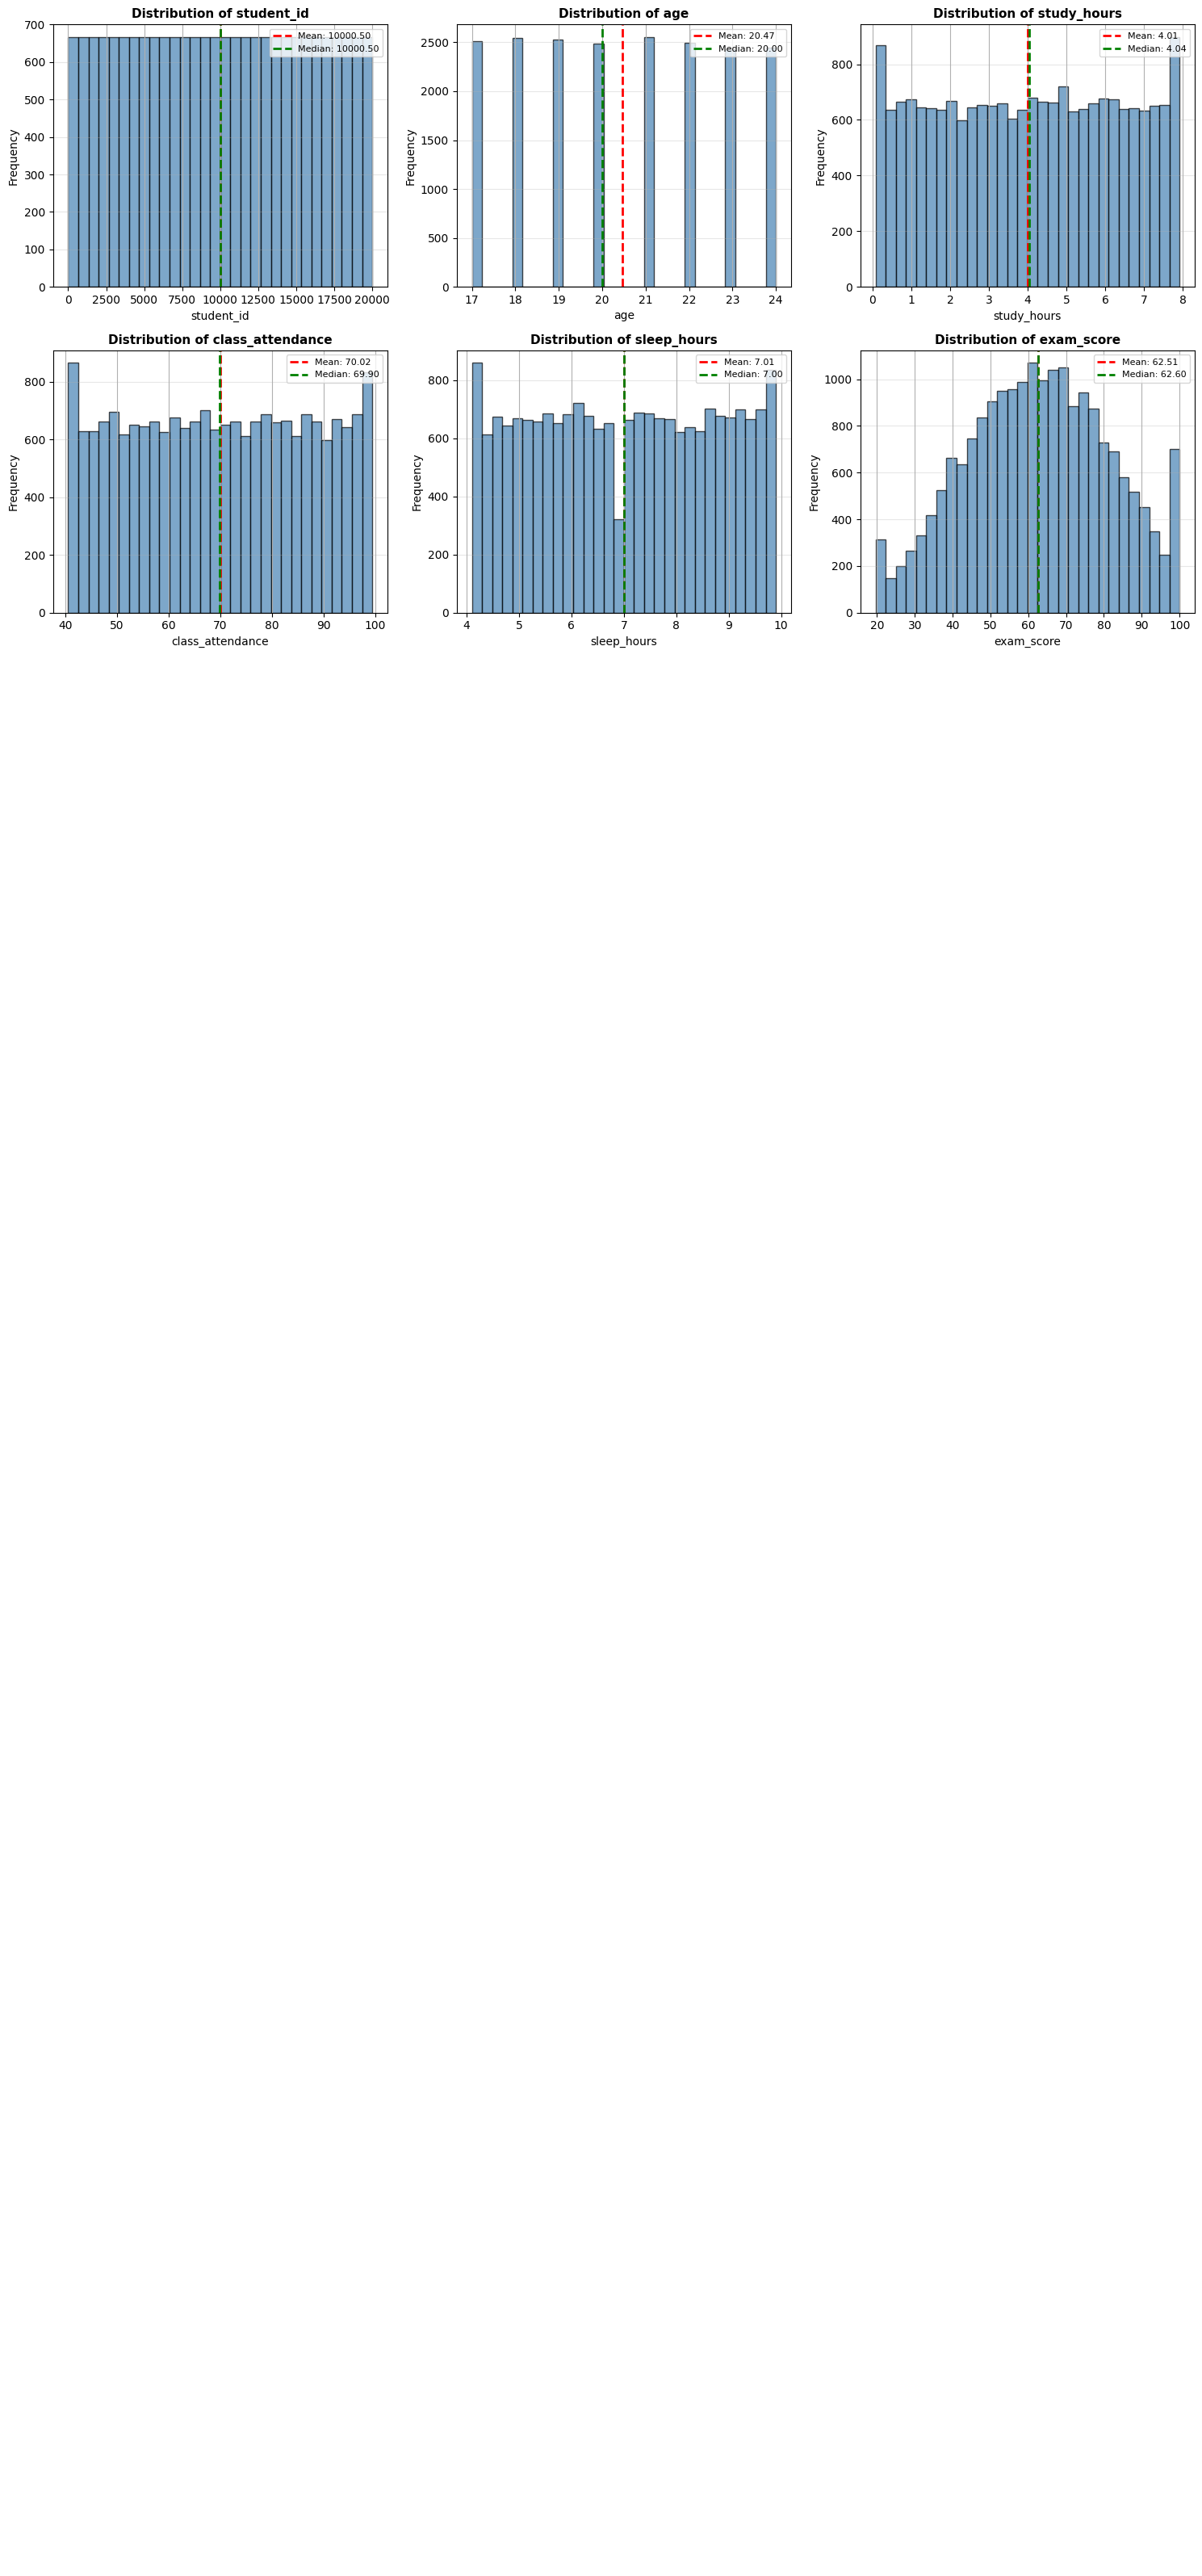

In [45]:
if len(numerical_cols) > 0:
    n_features = min(len(numerical_cols), 9) 
    n_rows = (n_features + 2) 
    n_cols = min(3, n_features)  
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.ravel() if n_features > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols[:9]):
        df[col].hist(bins=30, ax=axes[idx], alpha=0.7, 
                    color='steelblue', edgecolor='black')
        
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold', fontsize=11)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', 
                         linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', 
                         linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend(fontsize=8)

        axes[idx].grid(axis='y', alpha=0.3)
    
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('PREDICTWISE_visualizations/01_feature_distributions.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [49]:
if len(numerical_cols) >= 2:
    corr = df[numerical_cols].corr()
    high_corr = [
        (col1, col2, corr.loc[col1, col2])
        for i, col1 in enumerate(corr.columns)
        for j, col2 in enumerate(corr.columns)
        if j > i and abs(corr.loc[col1, col2]) > 0.7
    ]
    if high_corr:
        print("Highly Correlated Features (|correlation| > 0.7):")
        for f1, f2, c in high_corr:
            print(f"   {f1} ↔ {f2}: {c*100:.4f}")
    else:
        print("No highly correlated features found (good for modeling)")

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(
        corr, mask=mask, annot=True, fmt='.2f',
        cmap='coolwarm', center=0, square=True,
        linewidths=0.5, cbar_kws={"shrink": 0.8}
    )
    plt.title('Correlation Matrix - Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('PREDICTWISE_visualizations/02_correlation_matrix.png',
                dpi=300, bbox_inches='tight')
    plt.close()
    print("\nCorrelation Matrix:")
    print(corr)
    print("\n")

Highly Correlated Features (|correlation| > 0.7):
   study_hours ↔ exam_score: 71.7788

Correlation Matrix:
                  student_id       age  study_hours  class_attendance  \
student_id          1.000000 -0.002574     0.002116          0.001128   
age                -0.002574  1.000000     0.002955          0.008449   
study_hours         0.002116  0.002955     1.000000         -0.001645   
class_attendance    0.001128  0.008449    -0.001645          1.000000   
sleep_hours        -0.000560 -0.000385    -0.004533          0.007187   
exam_score          0.003269  0.006522     0.717788          0.308850   

                  sleep_hours  exam_score  
student_id          -0.000560    0.003269  
age                 -0.000385    0.006522  
study_hours         -0.004533    0.717788  
class_attendance     0.007187    0.308850  
sleep_hours          1.000000    0.133222  
exam_score           0.133222    1.000000  




In [51]:
outlier_summary = []

In [52]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        outlier_summary.append({
            'Feature': col,
            'Outliers': len(outliers),
            'Percentage': (len(outliers) / len(df)) * 100,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })
if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary).sort_values(
        'Outliers', ascending=False
    )
    print("Features with Outliers:")
    print(outlier_df.to_string(index=False))
else:
    print("No significant outliers detected")

print("\n")

No significant outliers detected




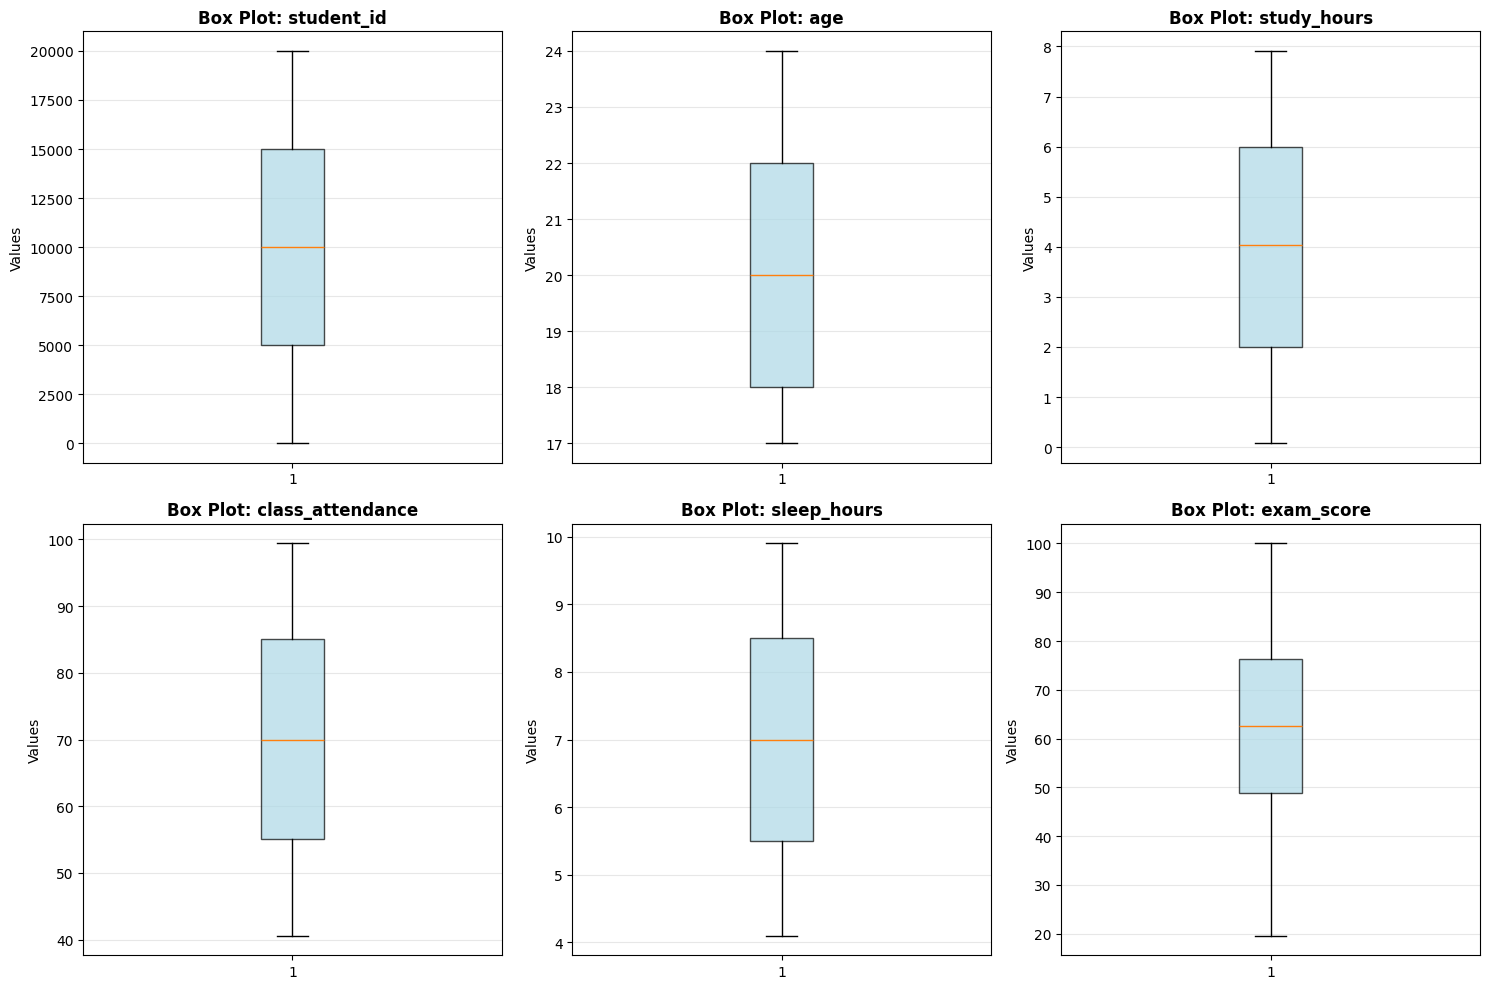

In [54]:
if len(numerical_cols) > 0:
    n_features = min(len(numerical_cols), 6)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    for idx, col in enumerate(numerical_cols[:6]):
        bp = axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)
        axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
        axes[idx].set_ylabel('Values')
        axes[idx].grid(axis='y', alpha=0.3)
    for idx in range(n_features, 6):
        axes[idx].axis('off')
    plt.tight_layout()
    plt.savefig('PREDICTWISE_visualizations/03_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

print("\n")

In [56]:
df_processed = df.copy()

In [57]:
missing_cols = df_processed.columns[df_processed.isnull().any()].tolist()

In [60]:
if missing_cols:
    print(f"Found missing values in {len(missing_cols)} columns")
    for col in missing_cols:
        if df_processed[col].dtype in [np.int64, np.float64]:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"'{col}': Filled with median = {median_val:.2f}")
        else:
            mode_val = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_val, inplace=True)
            print(f"'{col}': Filled with mode = '{mode_val}'")
else:
    print("No missing Values found")

No missing Values found


In [61]:
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
label_encoders = {} 

In [62]:
if categorical_cols:
    print(f"Found {len(categorical_cols)} categorical columns to encode")
    
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col + '_Encoded'] = le.fit_transform(
            df_processed[col].astype(str)
        )
        label_encoders[col] = le
        unique_vals = df_processed[col].unique()[:5]
        encoded_vals = le.transform(unique_vals.astype(str))
        print(f"\n   Column: {col}")
        print(f"   Unique values: {df_processed[col].nunique()}")
        print(f"   Encoding sample: {dict(zip(unique_vals, encoded_vals))}")
else:
    print("No categorical columns to encode")

Found 7 categorical columns to encode

   Column: gender
   Unique values: 3
   Encoding sample: {'male': np.int64(1), 'other': np.int64(2), 'female': np.int64(0)}

   Column: course
   Unique values: 7
   Encoding sample: {'diploma': np.int64(6), 'bca': np.int64(5), 'b.sc': np.int64(1), 'b.tech': np.int64(2), 'bba': np.int64(4)}

   Column: internet_access
   Unique values: 2
   Encoding sample: {'yes': np.int64(1), 'no': np.int64(0)}

   Column: sleep_quality
   Unique values: 3
   Encoding sample: {'poor': np.int64(2), 'average': np.int64(0), 'good': np.int64(1)}

   Column: study_method
   Unique values: 5
   Encoding sample: {'coaching': np.int64(0), 'online videos': np.int64(3), 'mixed': np.int64(2), 'self-study': np.int64(4), 'group study': np.int64(1)}

   Column: facility_rating
   Unique values: 3
   Encoding sample: {'low': np.int64(1), 'medium': np.int64(2), 'high': np.int64(0)}

   Column: exam_difficulty
   Unique values: 3
   Encoding sample: {'hard': np.int64(1), 'moder

In [64]:
target_keywords = ['score', 'grade', 'result', 'mark', 'exam', 'test']

In [65]:
potential_targets = [col for col in df_processed.columns 
                     if any(keyword in col.lower() for keyword in target_keywords)]

In [77]:
#here we are identifying possible target columns based on keywords, prints basic stats for each, and selects the first one as the targe
if potential_targets:
    print("Potential target variables found:")
    for target in potential_targets:
        print(f" - {target}")
        print(f"   Type: {df_processed[target].dtype}")
        try:
            print(f"   Range: {df_processed[target].min()} to {df_processed[target].max()}")
            print(f"   Mean: {df_processed[target].mean():.2f}")
        except:
            print("   (Non-numeric column — stats skipped)")
    
    target_column = potential_targets[0]  
    print(f"\nSelected Target: '{target_column}'")

Potential target variables found:
 - exam_difficulty
   Type: object
   Range: easy to moderate
   (Non-numeric column — stats skipped)
 - exam_score
   Type: float64
   Range: 19.599 to 100.0
   Mean: 62.51
 - exam_difficulty_Encoded
   Type: int64
   Range: 0 to 2
   Mean: 1.19

Selected Target: 'exam_difficulty'


In [80]:
exclude_cols = [target_column]

In [81]:
exclude_cols.extend(categorical_cols)  

In [82]:
feature_cols = [col for col in df_processed.columns 
                if col not in exclude_cols and 
                df_processed[col].dtype in [np.int64, np.float64, np.int32, np.float32]]

In [83]:
print(f"Target Variable: {target_column}")
print(f"Total Features: {len(feature_cols)}")

Target Variable: exam_difficulty
Total Features: 13


In [85]:
print("Feature List")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i:2d}. {col}")

Feature List
    1. student_id
    2. age
    3. study_hours
    4. class_attendance
    5. sleep_hours
    6. exam_score
    7. gender_Encoded
    8. course_Encoded
    9. internet_access_Encoded
   10. sleep_quality_Encoded
   11. study_method_Encoded
   12. facility_rating_Encoded
   13. exam_difficulty_Encoded


In [141]:
X = df_processed[feature_cols].copy()
y = df_processed[target_column].copy()

In [142]:
X = X.fillna(0)
X

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_Encoded,course_Encoded,internet_access_Encoded,sleep_quality_Encoded,study_method_Encoded,facility_rating_Encoded,exam_difficulty_Encoded
0,1,17,2.78,92.9,7.4,58.9,1,6,1,2,0,1,1
1,2,23,3.37,64.8,4.6,54.8,2,5,1,0,3,2,2
2,3,22,7.88,76.8,8.5,90.3,1,1,1,2,0,0,2
3,4,20,0.67,48.4,5.8,29.7,2,6,1,0,3,1,2
4,5,20,0.89,71.6,9.8,43.7,0,6,1,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,6.50,71.3,5.0,86.5,2,4,1,1,4,1,0
19996,19998,18,3.71,41.6,5.9,60.9,1,0,0,0,0,2,2
19997,19999,19,7.88,68.2,4.6,64.5,2,6,1,2,1,1,0
19998,20000,19,4.60,76.3,6.1,79.0,1,4,0,1,4,2,2


In [144]:
if y.dtype == 'object':
    y = y.fillna(y.mode()[0]) 
else:
    y = y.fillna(y.median()) 
y

0            hard
1        moderate
2        moderate
3        moderate
4        moderate
           ...   
19995        easy
19996    moderate
19997        easy
19998    moderate
19999    moderate
Name: exam_difficulty, Length: 20000, dtype: object

In [96]:
le = LabelEncoder()
y = le.fit_transform(y)

In [119]:
y.shape

(20000,)

In [97]:
print(f"X shape: {X.shape} (samples × features)")
print(f"y shape: {y.shape} (target values)")
print(f"y range: {y.min():.2f} to {y.max():.2f}")
print(f"y mean: {y.mean():.2f} ± {y.std():.2f}")

X shape: (20000, 13) (samples × features)
y shape: (20000,) (target values)
y range: 0.00 to 2.00
y mean: 1.19 ± 0.88


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [121]:
print("Training set:", X_train.shape[0], "samples:", f"{X_train.shape[0] / len(X) * 100:.1f}%")
print("Testing set:", X_test.shape[0], "samples:", f"{X_test.shape[0] / len(X) * 100:.1f}%")

Training set: 16000 samples: 80.0%
Testing set: 4000 samples: 20.0%


In [128]:
#scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
regression_results = {}
#storing result

In [130]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [132]:
lr_pred = model.predict(X_test)

In [133]:
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1228
           1       1.00      1.00      1.00       796
           2       1.00      1.00      1.00      1976

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [145]:
print(confusion_matrix(y_test, y_pred))

[[1228    0    0]
 [   0  796    0]
 [   0    0 1976]]


In [146]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [147]:
X_train_poly = poly.fit_transform(X_train_scaled[:, :min(5, X_train_scaled.shape[1])])
X_test_poly = poly.transform(X_test_scaled[:, :min(5, X_test_scaled.shape[1])])

In [148]:
poly_reg = LinearRegression()

In [149]:
poly_reg.fit(X_train_poly, y_train)
poly_pred = poly_reg.predict(X_test_poly)

In [150]:
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

In [151]:
regression_results['Polynomial Regression'] = {
    'RMSE': poly_rmse,
    'MAE': poly_mae,
    'R2-Score': poly_r2,
    'model': poly_reg
}

In [154]:
print(f"RMSE: {poly_rmse*100:.4f}")
print(f"MAE:  {poly_mae*100:.4f}")
print(f"R²:   {poly_r2*100:.4f}")

RMSE: 87.5128
MAE:  80.2362
R²:   0.0237


In [155]:
knn_reg = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

In [156]:
knn_reg.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [157]:
knn_pred = knn_reg.predict(X_test_scaled)

In [158]:
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

In [159]:
regression_results['KNN Regressor'] = {
    'RMSE': knn_rmse,
    'MAE': knn_mae,
    'R2-Score': knn_r2,
    'model': knn_reg
}

In [160]:
print(f"RMSE: {knn_rmse*100:.4f}")
print(f"MAE:  {knn_mae*100:.4f}")
print(f"R²:   {knn_r2*100:.4f}")

RMSE: 20.5670
MAE:  12.4600
R²:   94.4780


In [161]:
dt_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [162]:
dt_reg.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [163]:
dt_pred = dt_reg.predict(X_test_scaled)

In [164]:
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

In [165]:
regression_results['Decision Tree'] = {
    'RMSE': dt_rmse,
    'MAE': dt_mae,
    'R2-Score': dt_r2,
    'model': dt_reg
}

In [167]:
print(f"RMSE: {dt_rmse*100:.4f}")
print(f"MAE:  {dt_mae*100:.4f}")
print(f"R²:   {dt_r2*100:.4f}")

RMSE: 0.0000
MAE:  0.0000
R²:   100.0000


In [168]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=15, 
                               random_state=42, n_jobs=-1)

In [169]:
rf_reg.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [170]:
rf_pred = rf_reg.predict(X_test_scaled)

In [171]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [172]:
regression_results['Random Forest'] = {
    'RMSE': rf_rmse,
    'MAE': rf_mae,
    'R2-Score': rf_r2,
    'model': rf_reg
}

In [173]:
print(f"RMSE: {rf_rmse*100:.4f}")
print(f"MAE:  {rf_mae*100:.4f}")
print(f"R²:   {rf_r2*100:.4f}")

RMSE: 0.0000
MAE:  0.0000
R²:   100.0000


In [174]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [175]:
svr_model.fit(X_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [176]:
svr_pred = svr_model.predict(X_test_scaled)

In [177]:
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

In [178]:
regression_results['SVR'] = {
    'RMSE': svr_rmse,
    'MAE': svr_mae,
    'R2-Score': svr_r2,
    'model': svr_model
}

In [179]:
print(f"RMSE: {svr_rmse*100:.4f}")
print(f"MAE:  {svr_mae*100:.4f}")
print(f"R²:   {svr_r2*100:.4f}")

RMSE: 5.8757
MAE:  4.3477
R²:   99.5493


In [180]:
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                   max_depth=5, random_state=42)

In [181]:
gb_reg.fit(X_train_scaled, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [182]:
gb_pred = gb_reg.predict(X_test_scaled)

In [183]:
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

In [184]:
regression_results['Gradient Boosting'] = {
    'RMSE': gb_rmse,
    'MAE': gb_mae,
    'R2-Score': gb_r2,
    'model': gb_reg
}

In [185]:
print(f"RMSE: {gb_rmse*100:.4f}")
print(f"MAE:  {gb_mae*100:.4f}")
print(f"R²:   {gb_r2*100:.4f}")

RMSE: 0.0023
MAE:  0.0021
R²:   100.0000


In [186]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, 
                       max_depth=5, random_state=42)

In [187]:
xgb_reg.fit(X_train_scaled, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [188]:
xgb_pred = xgb_reg.predict(X_test_scaled)

In [189]:
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

In [190]:
regression_results['XGBoost'] = {
    'RMSE': xgb_rmse,
    'MAE': xgb_mae,
    'R2-Score': xgb_r2,
    'model': xgb_reg
}

In [191]:
print(f"RMSE: {xgb_rmse*100:.4f}")
print(f"MAE:  {xgb_mae*100:.4f}")
print(f"R²:   {xgb_r2*100:.4f}")

RMSE: 0.0023
MAE:  0.0021
R²:   100.0000


In [192]:
reg_comparison = pd.DataFrame(regression_results).T.drop('model', axis=1)
reg_comparison = reg_comparison.sort_values('R2-Score', ascending=False)
print("\n" + reg_comparison.to_string())


                           RMSE       MAE  R2-Score
Linear Regression           0.0       0.0       1.0
Decision Tree               0.0       0.0       1.0
Random Forest               0.0       0.0       1.0
XGBoost                0.000023  0.000021       1.0
Gradient Boosting      0.000023  0.000021       1.0
SVR                    0.058757  0.043477  0.995493
KNN Regressor           0.20567    0.1246   0.94478
Polynomial Regression  0.875128  0.802362  0.000237


In [193]:
best_reg_name = reg_comparison['R2-Score'].idxmax()
best_reg_model = regression_results[best_reg_name]['model']

In [194]:
print(f"BEST REGRESSION MODEL: {best_reg_name}")

BEST REGRESSION MODEL: Linear Regression


In [195]:
print(f"R² Score: {reg_comparison.loc[best_reg_name, 'R2-Score']:.4f}")
print(f"RMSE: {reg_comparison.loc[best_reg_name, 'RMSE']:.4f}")
print(f"MAE: {reg_comparison.loc[best_reg_name, 'MAE']:.4f}")

R² Score: 1.0000
RMSE: 0.0000
MAE: 0.0000


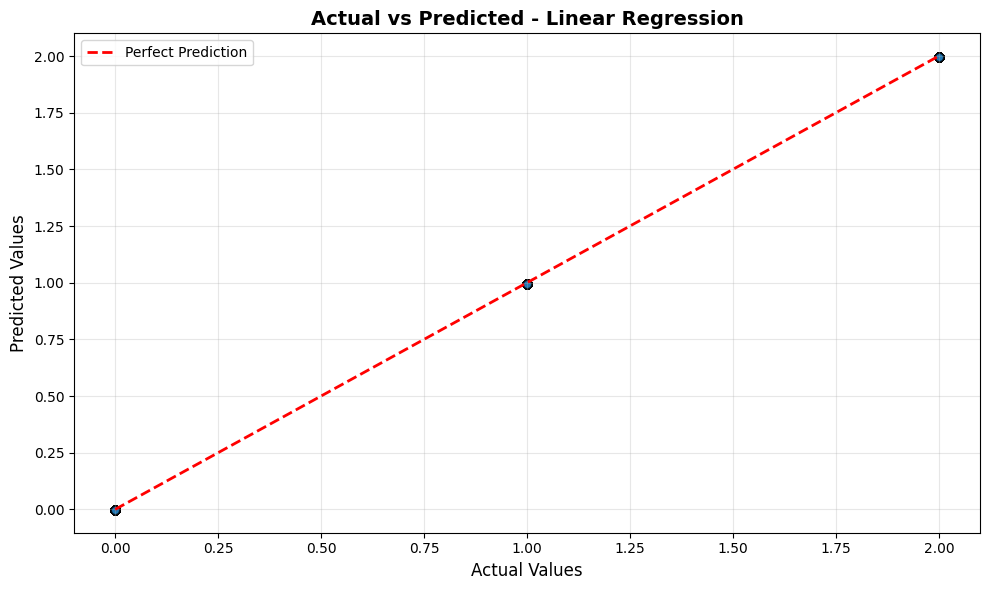

In [198]:
plt.figure(figsize=(10, 6))
best_pred = best_reg_model.predict(X_test_scaled)
plt.scatter(y_test, best_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'Actual vs Predicted - {best_reg_name}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('PREDICTWISE_visualizations/04_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [201]:
len(regression_results)

8

In [202]:
regression_results

{'Linear Regression': {'RMSE': np.float64(8.90832051904675e-16),
  'MAE': 6.864508961257343e-16,
  'R2-Score': 1.0,
  'model': LinearRegression()},
 'Polynomial Regression': {'RMSE': np.float64(0.8751281247383601),
  'MAE': 0.802361774820886,
  'R2-Score': 0.0002372819010212357,
  'model': LinearRegression()},
 'KNN Regressor': {'RMSE': np.float64(0.2056696380120313),
  'MAE': 0.12459999999999997,
  'R2-Score': 0.9447803026248285,
  'model': KNeighborsRegressor(metric='euclidean')},
 'Decision Tree': {'RMSE': np.float64(0.0),
  'MAE': 0.0,
  'R2-Score': 1.0,
  'model': DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)},
 'Random Forest': {'RMSE': np.float64(0.0),
  'MAE': 0.0,
  'R2-Score': 1.0,
  'model': RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42)},
 'SVR': {'RMSE': np.float64(0.058756647648761554),
  'MAE': 0.04347747846048554,
  'R2-Score': 0.9954932063546766,
  'model': SVR()},
 'Gradient Boosting': {'RMSE': np.float64(2.324738598784704e

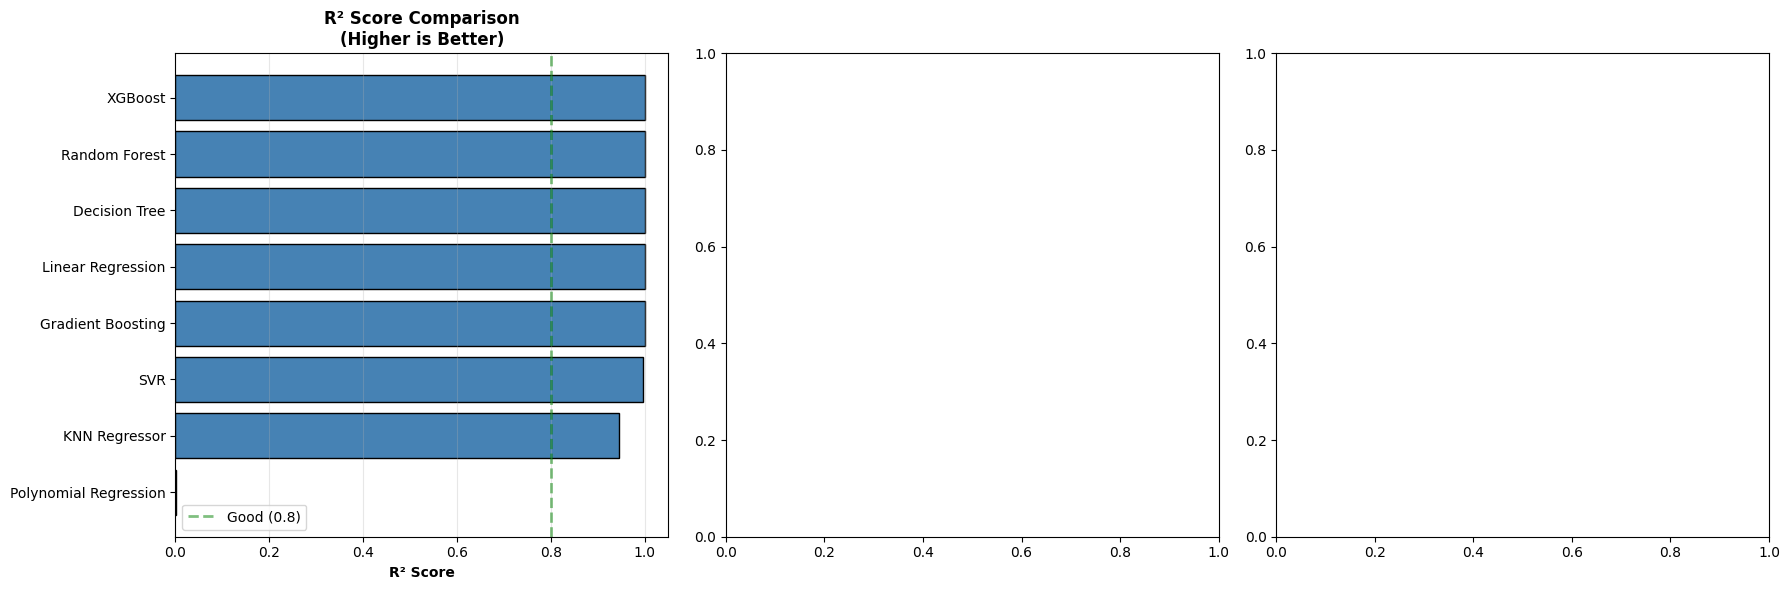

In [213]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
reg_comparison_sorted = reg_comparison.sort_values('R2-Score', ascending=True)
axes[0].barh(reg_comparison_sorted.index, reg_comparison_sorted['R2-Score'], 
             color='steelblue', edgecolor='black')
axes[0].set_xlabel('R² Score', fontweight='bold')
axes[0].set_title('R² Score Comparison\n(Higher is Better)', fontweight='bold', fontsize=12)
axes[0].axvline(x=0.8, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Good (0.8)')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('PREDICTWISE_visualizations/06_regression_comparison.png', dpi=300, bbox_inches='tight')

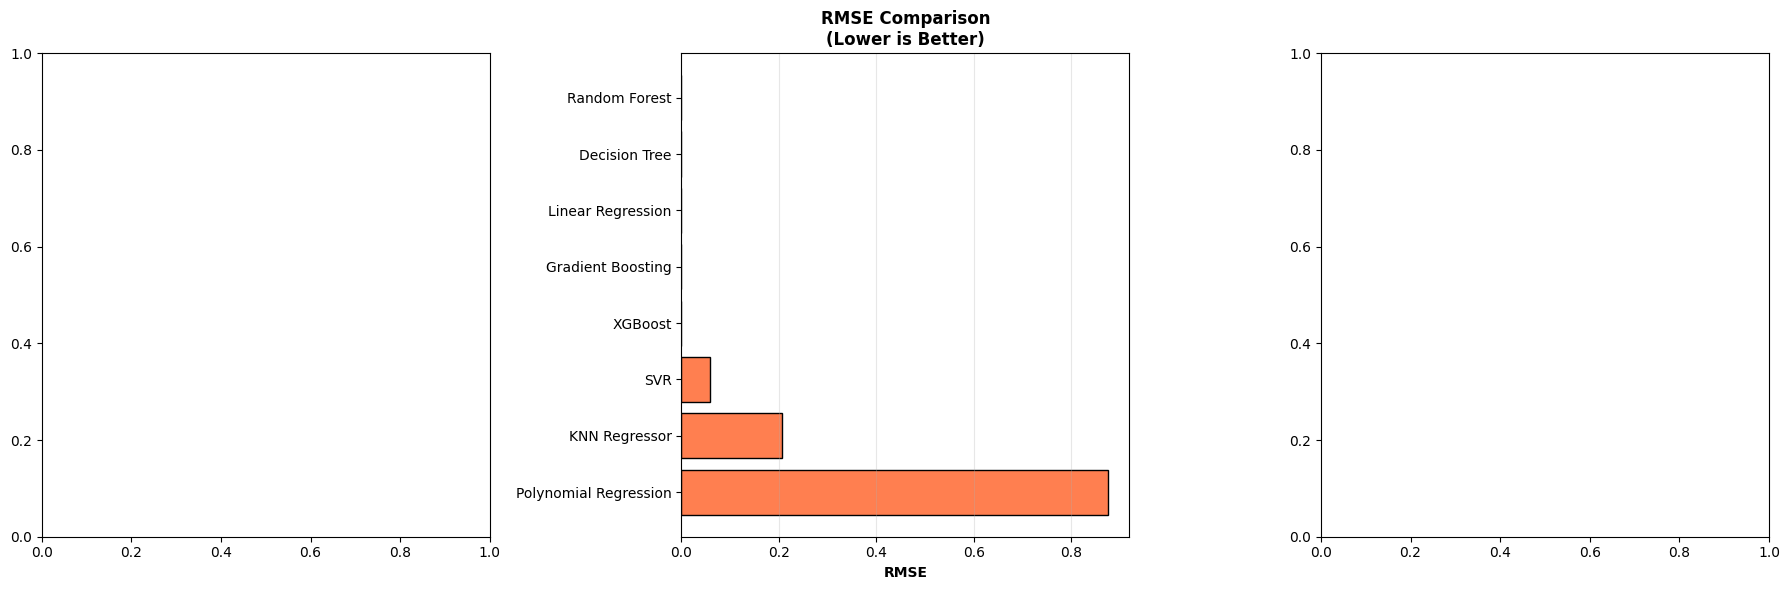

In [214]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
reg_rmse_sorted = reg_comparison.sort_values('RMSE', ascending=False)
axes[1].barh(reg_rmse_sorted.index, reg_rmse_sorted['RMSE'], 
             color='coral', edgecolor='black')
axes[1].set_xlabel('RMSE', fontweight='bold')
axes[1].set_title('RMSE Comparison\n(Lower is Better)', fontweight='bold', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('PREDICTWISE_visualizations/06_regression_comparison.png', dpi=300, bbox_inches='tight')

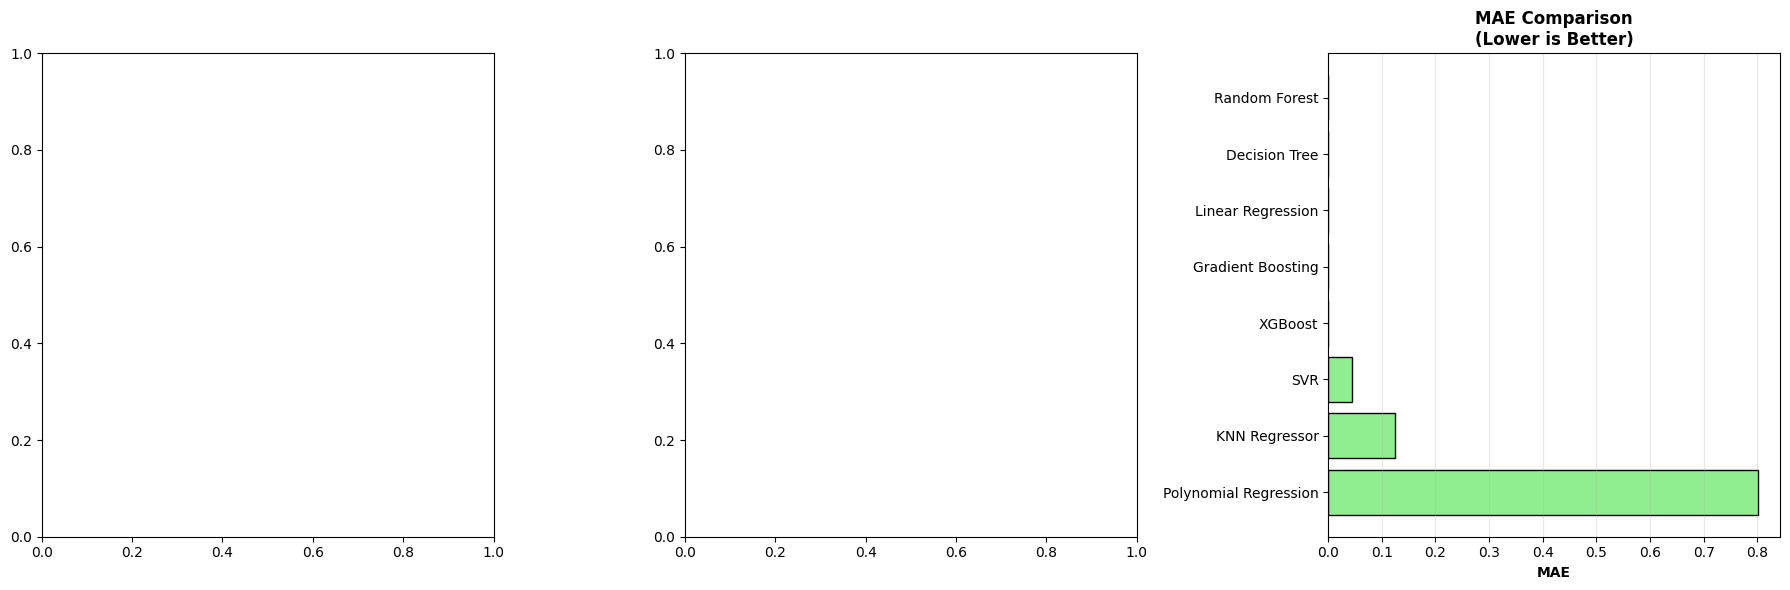

In [216]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
reg_mae_sorted = reg_comparison.sort_values('MAE', ascending=False)
axes[2].barh(reg_mae_sorted.index, reg_mae_sorted['MAE'], 
             color='lightgreen', edgecolor='black')
axes[2].set_xlabel('MAE', fontweight='bold')
axes[2].set_title('MAE Comparison\n(Lower is Better)', fontweight='bold', fontsize=12)
axes[2].grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('PREDICTWISE_visualizations/06_regression_comparison.png', dpi=300, bbox_inches='tight')

In [225]:
sample_1 = {col: df_processed[col].median() for col in feature_cols}
for col in feature_cols:
    sample_1[col] = df_processed[col].median()

In [226]:
sample_1 = {col: df_processed[col].median() for col in feature_cols}
for col in feature_cols:
    sample_2[col] = df_processed[col].quantile(0.75)

In [227]:
sample_3 = {col: df_processed[col].min() for col in feature_cols}
for col in feature_cols:
    sample_3[col] = df_processed[col].quantile(0.25) 

In [228]:
test_samples = {
    'Average Student': sample_1,
    'High Performer': sample_2,
    'Low Performer': sample_3
}

In [239]:
performance_map = {
    2: "Excellent",
    1: "Good",
    0: "Needs Improvement"
}
for sample_name, sample_data in test_samples.items():
    print(f"Test Case: {sample_name}")
    sample_df = pd.DataFrame([sample_data])
    sample_scaled = scaler.transform(sample_df)
    prediction_encoded = model.predict(sample_scaled)
    prediction_label = le.inverse_transform(prediction_encoded)[0]
    performance_level = performance_map.get(prediction_label, "Unknown")
    print(f"PREDICTION RESULT: {prediction_label}")
    print(f"Performance Level: {performance_level}\n")

Test Case: Average Student
PREDICTION RESULT: 0
Performance Level: Needs Improvement

Test Case: High Performer
PREDICTION RESULT: 2
Performance Level: Excellent

Test Case: Low Performer
PREDICTION RESULT: 0
Performance Level: Needs Improvement

